# EDA 예시 노트북: 이커머스 주문 데이터

## 0. 환경 설정


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib  # noqa: F401


## 1. 데이터 불러오기


In [39]:
# 같은 폴더에 있는 CSV 파일을 읽는 방식
df = pd.read_csv("./data/eda_example_ecommerce_orders.csv")

df.head()


,주문일자,상품_카테고리,구매채널,회원등급,주문금액(원),할인금액(원),구매수량,배송소요일,재구매여부
0,2024-03-01,식품,웹,일반,100276.0,4329.0,3,3.4,N
1,2024-03-02,식품,모바일앱,골드,43956.0,536.0,4,3.9,Y
2,2024-03-03,의류,웹,일반,56720.0,1413.0,1,0.7,N
3,2024-03-04,식품,모바일앱,일반,111861.0,8069.0,2,2.7,N
4,2024-03-05,식품,웹,실버,80148.0,3722.0,1,1.8,N


## 2. 데이터 전처리


### 2-1. 데이터 정보 확인하기


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문일자     300 non-null    object 
 1   상품_카테고리  300 non-null    object 
 2   구매채널     300 non-null    object 
 3   회원등급     300 non-null    object 
 4   주문금액(원)  300 non-null    float64
 5   할인금액(원)  290 non-null    float64
 6   구매수량     300 non-null    int64  
 7   배송소요일    288 non-null    float64
 8   재구매여부    300 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 21.2+ KB


In [ ]:
df.describe()

# std가 중요



,주문금액(원),할인금액(원),구매수량,배송소요일
count,300.000000,290.000000,300.000000,288.000000
mean,56179.726667,6120.627586,2.253333,2.925000
std,45230.363811,3728.121578,1.299275,1.473269
min,5000.000000,0.000000,1.000000,0.500000
25%,34911.750000,3290.750000,1.000000,1.900000
50%,53359.000000,6343.000000,2.000000,2.850000
75%,69197.500000,8706.750000,3.000000,3.900000
max,510000.000000,15090.000000,6.000000,7.800000


In [42]:
df.describe(include="object")


,주문일자,상품_카테고리,구매채널,회원등급,재구매여부
count,300,300,300,300,300
unique,300,5,3,4,2
top,2024-03-01,식품,웹,일반,N
freq,1,88,129,141,205


📌 확인 포인트  
- 어떤 컬럼이 범주형 데이터인지 확인  
- 결측치가 있는 컬럼이 무엇인지 확인  
- 금액 데이터 분포가 자연스러운지 확인


### 2-2. 데이터 형 변환


In [43]:
df["주문일자"] = pd.to_datetime(df["주문일자"])
df.dtypes


주문일자       datetime64[ns]
상품_카테고리            object
구매채널               object
회원등급               object
주문금액(원)           float64
할인금액(원)           float64
구매수량                int64
배송소요일             float64
재구매여부              object
dtype: object

### 2-3. 결측치 파악 및 처리


In [44]:
df.isnull().sum()


주문일자        0
상품_카테고리     0
구매채널        0
회원등급        0
주문금액(원)     0
할인금액(원)    10
구매수량        0
배송소요일      12
재구매여부       0
dtype: int64

In [45]:
# 배송소요일 결측치 → 중앙값으로 대체
df["배송소요일"] = df["배송소요일"].fillna(df["배송소요일"].median())

# 할인금액 결측치 → 할인 없음으로 가정
df["할인금액(원)"] = df["할인금액(원)"].fillna(0)

df.isnull().sum()


주문일자       0
상품_카테고리    0
구매채널       0
회원등급       0
주문금액(원)    0
할인금액(원)    0
구매수량       0
배송소요일      0
재구매여부      0
dtype: int64

💡 생각해볼 질문  
- 왜 배송소요일이 비었을지 추정  
- 할인금액 결측을 0으로 처리하는 가정의 타당성 판단


### 2-4. 이상치 파악 및 처리


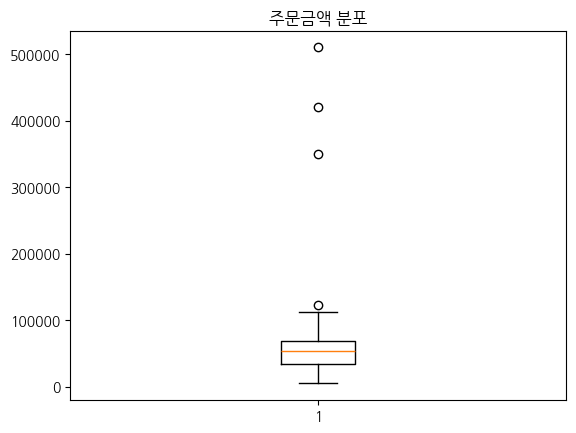

In [46]:
plt.boxplot(df["주문금액(원)"])
plt.title("주문금액 분포")
plt.show()


In [47]:
# IQR 기준 이상치 확인
q1 = df["주문금액(원)"].quantile(0.25)
q3 = df["주문금액(원)"].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
df[df["주문금액(원)"] > upper_bound]


,주문일자,상품_카테고리,구매채널,회원등급,주문금액(원),할인금액(원),구매수량,배송소요일,재구매여부
115,2024-06-24,의류,모바일앱,일반,350000.0,2604.0,4,3.1,N
160,2024-08-08,의류,오프라인,일반,420000.0,3831.0,3,0.5,N
189,2024-09-06,식품,모바일앱,일반,510000.0,15090.0,2,3.2,N
287,2024-12-13,식품,웹,일반,123335.0,8178.0,3,2.3,Y


📌 주의  
- 이상치는 무조건 제거 대상이 아님  
- VIP/단체구매/오류 등 가설을 세운 뒤 처리 필요


### 2-5. 파생 변수 생성 (스케일 변환 포함)


In [48]:
# 실결제금액
df["실결제금액(원)"] = df["주문금액(원)"] - df["할인금액(원)"]

# 상품 단가
df["상품단가(원)"] = df["주문금액(원)"] / df["구매수량"]

df.head()


,주문일자,상품_카테고리,구매채널,회원등급,주문금액(원),할인금액(원),구매수량,배송소요일,재구매여부,실결제금액(원),상품단가(원)
0,2024-03-01,식품,웹,일반,100276.0,4329.0,3,3.4,N,95947.0,33425.333333
1,2024-03-02,식품,모바일앱,골드,43956.0,536.0,4,3.9,Y,43420.0,10989.000000
2,2024-03-03,의류,웹,일반,56720.0,1413.0,1,0.7,N,55307.0,56720.000000
3,2024-03-04,식품,모바일앱,일반,111861.0,8069.0,2,2.7,N,103792.0,55930.500000
4,2024-03-05,식품,웹,실버,80148.0,3722.0,1,1.8,N,76426.0,80148.000000


## 3. 데이터 탐색하기


### 3-1. 컬럼 탐색하기


#### 3-1-1. 주문금액 분포


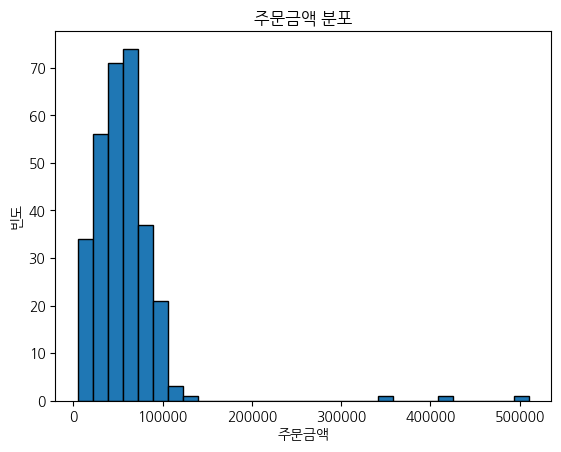

In [76]:
plt.hist(df["주문금액(원)"], bins=30, edgecolor="black")
plt.title("주문금액 분포")
plt.xlabel("주문금액")
plt.ylabel("빈도")
plt.show()


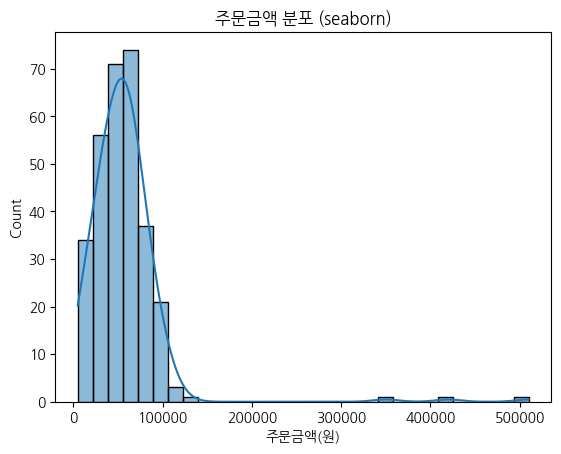

In [50]:
sns.histplot(df["주문금액(원)"], bins=30, kde=True)
plt.title("주문금액 분포 (seaborn)")
plt.show()


#### 3-1-2. 파이 차트: 구매채널 비율


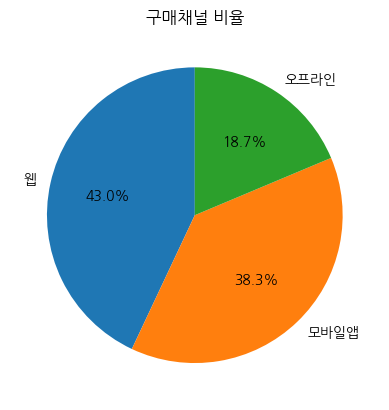

In [51]:
channel_counts = df["구매채널"].value_counts()

plt.pie(
    channel_counts,
    labels=channel_counts.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("구매채널 비율")
plt.show()


### 3-2. 그룹별 탐색하기


#### 3-2-1. groupby로 숫자 요약 후 시각화: 상품 카테고리별 평균 주문금액


In [52]:
category_summary = df.groupby("상품_카테고리")["주문금액(원)"].mean()
category_summary


상품_카테고리
뷰티      46255.458333
생활용품    53005.200000
식품      59713.284091
의류      63580.960784
전자기기    52758.048387
Name: 주문금액(원), dtype: float64

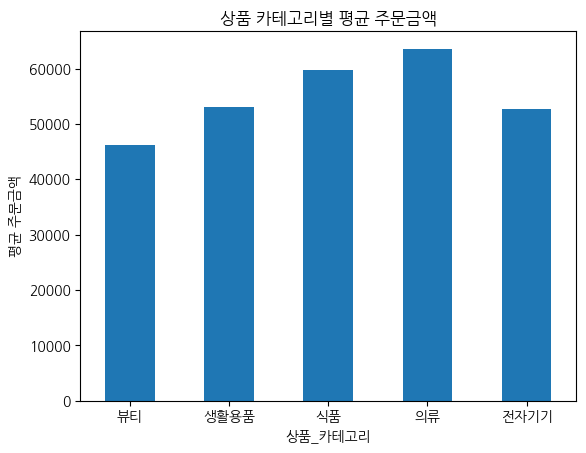

In [79]:
category_summary.plot(kind="bar")
plt.title("상품 카테고리별 평균 주문금액")
plt.ylabel("평균 주문금액")
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()


#### 3-2-2. seaborn으로 요약 없이 바로 시각화: 상품 카테고리별 평균 주문금액


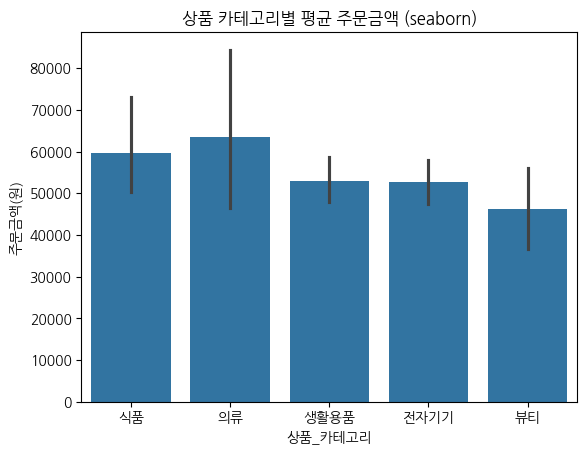

In [54]:
sns.barplot(
    data=df,
    x="상품_카테고리",
    y="주문금액(원)",
    estimator=np.mean
)
plt.title("상품 카테고리별 평균 주문금액 (seaborn)")
plt.show()


#### 3-2-3. 히트맵: 회원등급 × 구매채널 평균 주문금액


In [55]:
pivot_table = df.pivot_table(
    values="주문금액(원)",
    index="회원등급",
    columns="구매채널",
    aggfunc="mean"
)

pivot_table


구매채널,모바일앱,오프라인,웹
회원등급,,,
VIP,70383.000000,54648.250000,55053.647059
골드,50030.125000,59923.777778,47185.705882
실버,50892.193548,48765.400000,55708.638889
일반,67052.033898,72519.304348,46466.474576


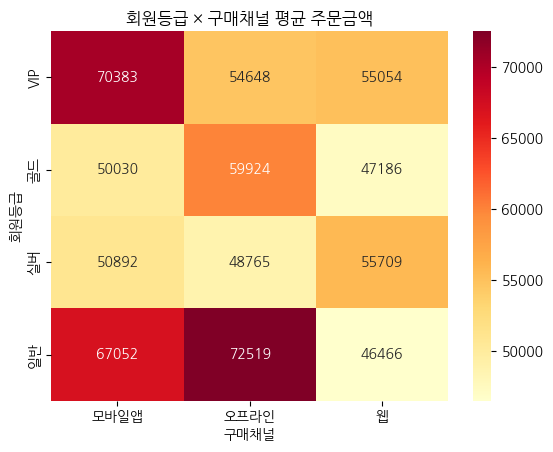

In [56]:
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title("회원등급 × 구매채널 평균 주문금액")
plt.show()


#### 3-2-4. 회원등급별 실결제금액 분포 (박스플롯)


In [57]:
df.groupby("회원등급")["실결제금액(원)"].mean()


회원등급
VIP    54183.666667
골드     45828.404762
실버     45982.436782
일반     53391.212766
Name: 실결제금액(원), dtype: float64

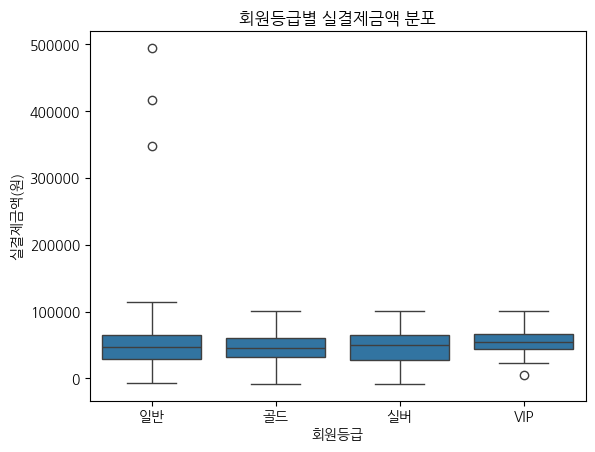

In [58]:
sns.boxplot(
    data=df,
    x="회원등급",
    y="실결제금액(원)"
)
plt.title("회원등급별 실결제금액 분포")
plt.show()


### 3-3. 컬럼 간 관계 파악하기


#### 3-3-1. 산점도: 주문금액 vs 배송소요일


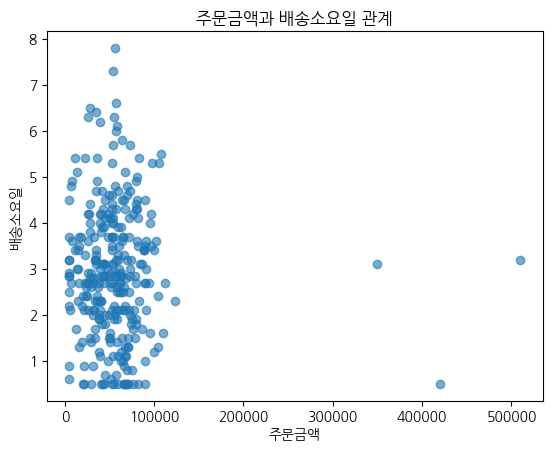

In [59]:
plt.scatter(df["주문금액(원)"], df["배송소요일"], alpha=0.6)
plt.xlabel("주문금액")
plt.ylabel("배송소요일")
plt.title("주문금액과 배송소요일 관계")
plt.show()


#### 3-3-2. seaborn 산점도: 구매채널별 색상


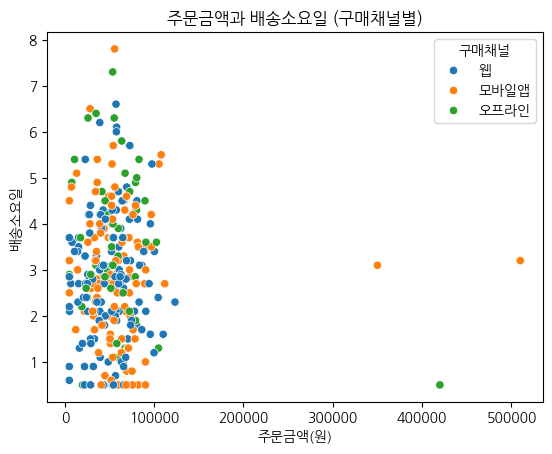

In [60]:
sns.scatterplot(
    data=df,
    x="주문금액(원)",
    y="배송소요일",
    hue="구매채널"
)
plt.title("주문금액과 배송소요일 (구매채널별)")
plt.show()


#### 3-3-3. 버블 차트: 주문금액 × 배송소요일 × 구매수량


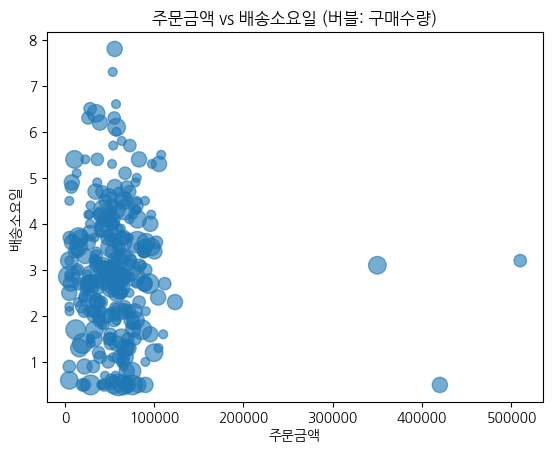

In [61]:
plt.scatter(
    df["주문금액(원)"],
    df["배송소요일"],
    s=df["구매수량"] * 40,
    alpha=0.6
)
plt.xlabel("주문금액")
plt.ylabel("배송소요일")
plt.title("주문금액 vs 배송소요일 (버블: 구매수량)")
plt.show()


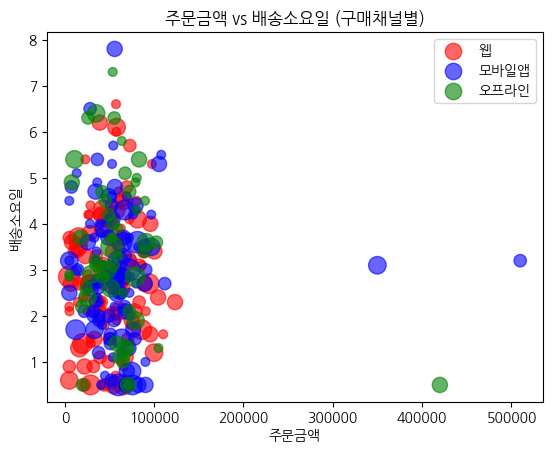

In [83]:
channels = df["구매채널"].unique()
colors = ["red", "blue", "green"]

for channel, color in zip(channels, colors):
    subset = df[df["구매채널"] == channel]
    
    plt.scatter(
        subset["주문금액(원)"],
        subset["배송소요일"],
        s=subset["구매수량"] * 40,
        alpha=0.6,
        label=channel,
        color=color
    )

plt.xlabel("주문금액")
plt.ylabel("배송소요일")
plt.title("주문금액 vs 배송소요일 (구매채널별)")
plt.legend()
plt.show()

#### 3-3-4. 히트맵:: 수치형 변수 상관관계

In [84]:
# 숫자형 컬럼만 선택
numeric_df = df[[
    "주문금액(원)",
    "할인금액(원)",
    "구매수량",
    "배송소요일",
    "실결제금액(원)",
    "상품단가(원)"
]]

# 상관계수 계산
corr_matrix = numeric_df.corr()

corr_matrix

,주문금액(원),할인금액(원),구매수량,배송소요일,실결제금액(원),상품단가(원)
주문금액(원),1.000000,0.066599,0.064734,-0.042001,0.996415,0.703171
할인금액(원),0.066599,1.000000,-0.010860,-0.101414,-0.018047,0.085879
구매수량,0.064734,-0.010860,1.000000,-0.074847,0.065789,-0.511975
배송소요일,-0.042001,-0.101414,-0.074847,1.000000,-0.033489,0.033535
실결제금액(원),0.996415,-0.018047,0.065789,-0.033489,1.000000,0.697340
상품단가(원),0.703171,0.085879,-0.511975,0.033535,0.697340,1.000000


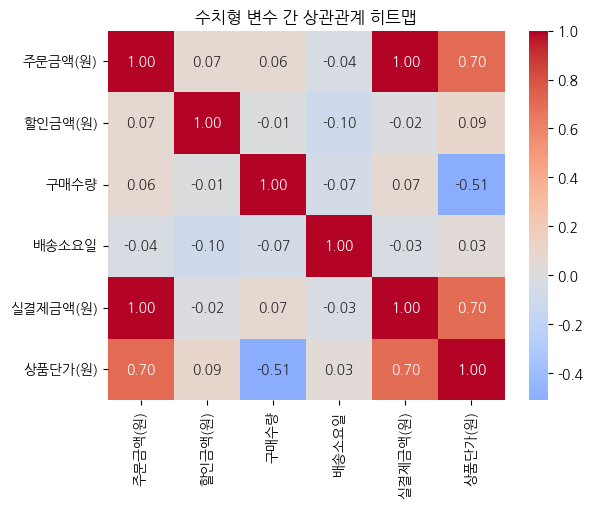

In [85]:
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("수치형 변수 간 상관관계 히트맵")
plt.show()

### 3-4. 시계열 탐색하기


#### 3-4-1. groupby로 일별 합계 계산 후 시각화


In [62]:
daily_sales = df.groupby("주문일자")["주문금액(원)"].sum()
daily_sales.head()


주문일자
2024-03-01    100276.0
2024-03-02     43956.0
2024-03-03     56720.0
2024-03-04    111861.0
2024-03-05     80148.0
Name: 주문금액(원), dtype: float64

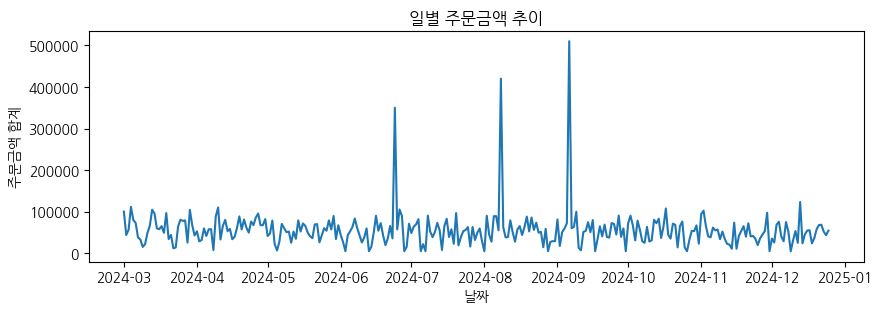

In [82]:
plt.figure(figsize=(10,3))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("일별 주문금액 추이")
plt.xlabel("날짜")
plt.ylabel("주문금액 합계")
plt.show()


### 3-5. seaborn으로 한 번에 보는 비교 시각화


#### 3-5-1. 재구매 여부별 주문금액 분포 (박스플롯)


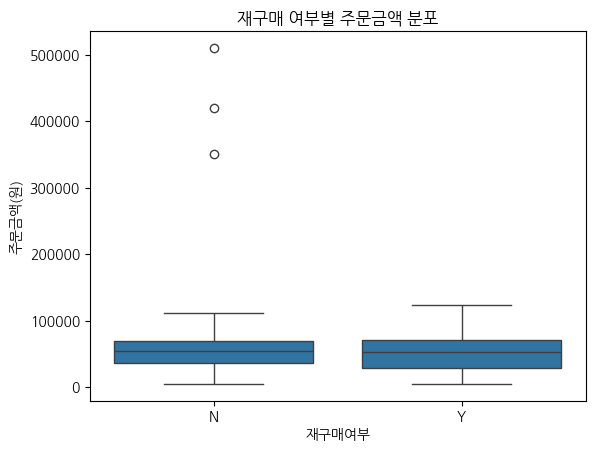

In [64]:
sns.boxplot(
    data=df,
    x="재구매여부",
    y="주문금액(원)"
)
plt.title("재구매 여부별 주문금액 분포")
plt.show()


### 3-6. 선택: 여러 변수 한 번에 보기 (pairplot)


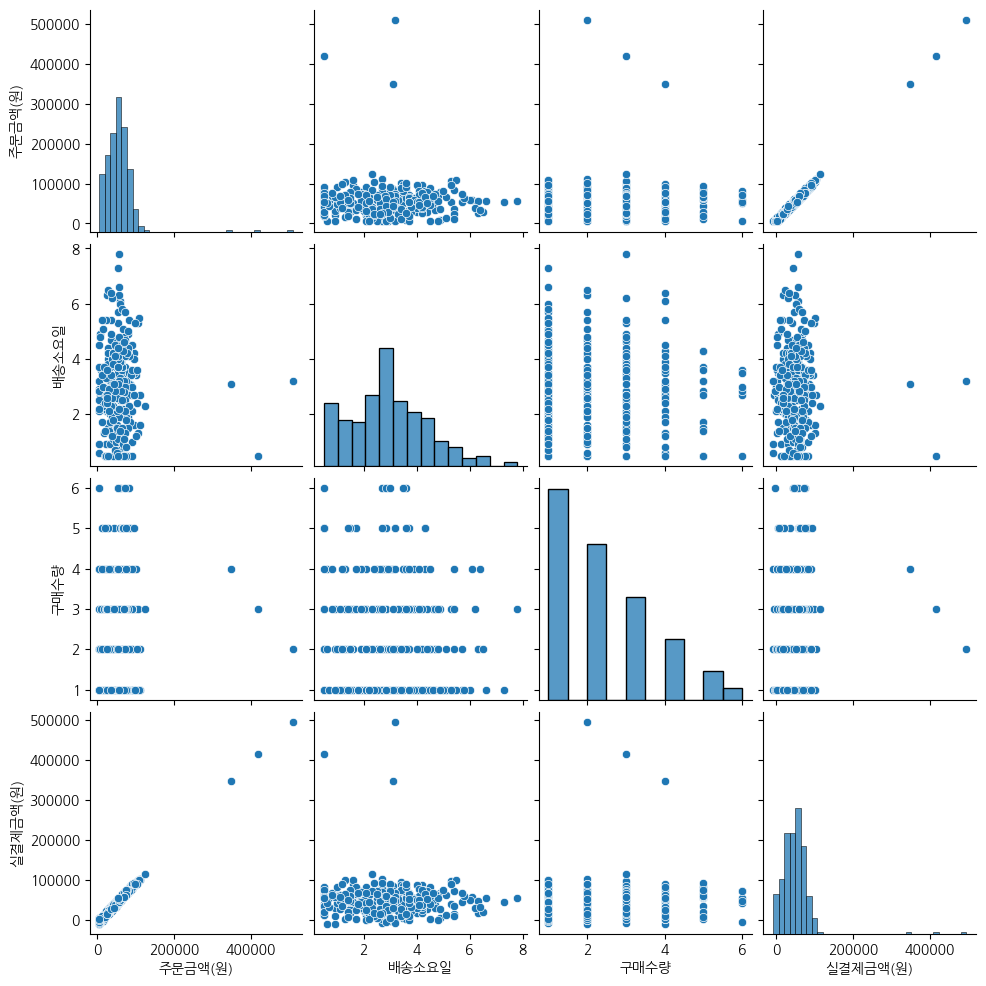

In [65]:
sns.pairplot(
    df[["주문금액(원)", "배송소요일", "구매수량", "실결제금액(원)"]],
    diag_kind="hist"
)
plt.show()


📌 주의  
- 데이터가 커지면 오래 걸릴 수 있음  
- 모든 상황에 항상 적합한 시각화는 아님


## 4. 사용 가이드 (학생 유도용)


이 노트북은 **정답지**가 아니라 **참고서**임  

- 데이터 구조 파악 방식  
- 탐색 순서  
- 질문을 던지는 방식  

만 참고하고, 실제 과제 데이터에서는 **컬럼 이름/분포/결측 구조**가 달라질 수 있으므로  
코드를 그대로 실행하기보다 **데이터에 맞게 수정**하는 연습이 필요함  

📌 추천 검색 키워드 예시  
- `seaborn countplot`  
- `seaborn boxplot outliers`  
- `matplotlib time series plot`  
- `seaborn heatmap pivot_table`  
- `bubble chart matplotlib size`
